In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:

df_city = pd.read_csv("city_data.csv")
df_ride = pd.read_csv("ride_data.csv")

df_merge = pd.merge(df_ride, df_city, how="left", on=["city", "city"])
df_merge.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


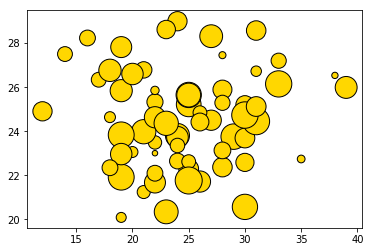

In [3]:

urban_cities = df_merge[df_merge["type"] == "Urban"]
urban_ride = urban_cities.groupby(["city"]).count()["ride_id"]
urban_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver = urban_cities.groupby(["city"]).mean()["driver_count"]

plt.scatter(urban_ride, urban_fare, s=10*urban_driver, c="gold", edgecolor="black", marker="o", label="urban")
plt.show()

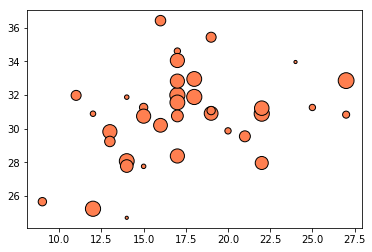

In [4]:
suburban_cities = df_merge[df_merge["type"] == "Suburban"]
suburban_ride = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver = suburban_cities.groupby(["city"]).mean()["driver_count"]

plt.scatter(suburban_ride, suburban_avg, s=10*suburban_driver, c="coral", edgecolor="black", marker="o", label="suburb")


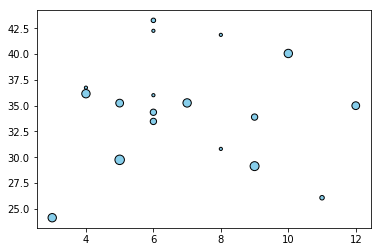

In [5]:
rural_cities = df_merge[df_merge["type"] == "Rural"]
rural_ride = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver = rural_cities.groupby(["city"]).mean()["driver_count"]

plt.scatter(rural_ride, rural_avg, s=10*rural_driver, c="skyblue", edgecolor="black", marker="o", label="rural")



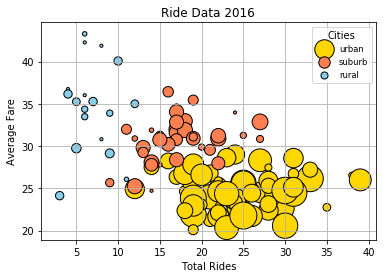

In [6]:
plt.scatter(urban_ride, urban_fare, s=10*urban_driver, c="gold", edgecolor="black", marker="o", label="urban")
plt.scatter(suburban_ride, suburban_avg, s=10*suburban_driver, c="coral", edgecolor="black", marker="o", label="suburb")
plt.scatter(rural_ride, rural_avg, s=10*rural_driver, c="skyblue", edgecolor="black", marker="o", label="rural")


plt.title("Ride Data 2016")
plt.ylabel("Average Fare")
plt.xlabel("Total Rides")
plt.grid(True)

plt.legend(fontsize="small",loc="best", title="Cities")

plt.savefig("scatter.png")

plt.show()


In [7]:
pie_perc = 100 * df_merge.groupby(["type"]).count()["ride_id"] / df_merge["ride_id"].count()
pie_perc

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

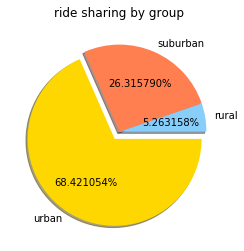

In [8]:
plt.pie(pie_perc, labels=["rural", "suburban", "urban"], colors=["lightskyblue", "coral", "gold"], explode=[0, 0, 0.1],
        shadow=True,autopct='%1f%%')
plt.title("ride sharing by group")

plt.savefig("cirlce_city_type.png")

plt.show()


In [9]:
driver_pie = 100 * df_merge.groupby(["type"]).sum()["driver_count"] / df_merge["driver_count"].sum()
driver_pie

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

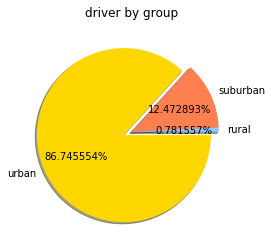

In [10]:
plt.pie(driver_pie, labels=["rural", "suburban", "urban"], colors=["lightskyblue", "coral", "gold"], explode=[0, 0, 0.1],
        shadow=True,autopct='%1f%%')
plt.title("driver by group")

plt.savefig("driver_city_type.png")

plt.show()

In [11]:
fares_group = 100 * df_merge.groupby(["type"]).sum()["fare"] / df_merge["fare"].sum()
fares_group


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

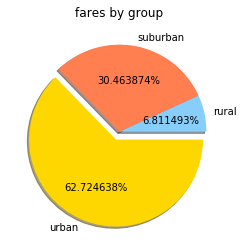

In [12]:
plt.pie(fares_group, labels=["rural", "suburban", "urban"], colors=["lightskyblue", "coral", "gold"], explode=[0, 0, 0.1],
        shadow=True,autopct='%1f%%')
plt.title("fares by group")

plt.savefig("fares.png")

plt.show()